<a href="https://colab.research.google.com/github/Ogunsolaio/My_MEEC_ISE_UAlg_Machine_learning/blob/main/DiabetesProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing libraries which will be required
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import tensorflow as tf

In [ ]:
# Loading the dataset and showing the first 5 rows of train data
train = pd.read_csv('/content/MLAula13_diabetesTRAIN4student.csv')
test = pd.read_csv('/content/MLAula13_diabetesTEST4student.csv')
train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [ ]:
# Checking total rows and columns in the train dataset
train.shape


(748, 9)

In [ ]:
# Some statistical measures of the train dataset

train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000,748.00000
mean,3.826203,120.677807,69.131016,20.454545,78.155080,31.995722,0.473832,33.140374,0.34492
std,3.338030,31.908784,19.258377,15.992864,111.069982,7.884856,0.330450,11.668116,0.47566
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.00000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244750,24.000000,0.00000
50%,3.000000,117.000000,72.000000,23.000000,24.000000,32.000000,0.378000,29.000000,0.00000
75%,6.000000,140.000000,80.000000,32.000000,126.250000,36.500000,0.629250,40.000000,1.00000
max,17.000000,199.000000,122.000000,99.000000,744.000000,67.100000,2.420000,81.000000,1.00000


In [ ]:
#Statistical Measure of the Train Data and transposing to be able to read better

train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,748.0,3.826203,3.338030,0.000,1.00000,3.000,6.00000,17.00
Glucose,748.0,120.677807,31.908784,0.000,99.00000,117.000,140.00000,199.00
BloodPressure,748.0,69.131016,19.258377,0.000,62.00000,72.000,80.00000,122.00
SkinThickness,748.0,20.454545,15.992864,0.000,0.00000,23.000,32.00000,99.00
Insulin,748.0,78.155080,111.069982,0.000,0.00000,24.000,126.25000,744.00
BMI,748.0,31.995722,7.884856,0.000,27.30000,32.000,36.50000,67.10
DiabetesPedigreeFunction,748.0,0.473832,0.330450,0.078,0.24475,0.378,0.62925,2.42
Age,748.0,33.140374,11.668116,21.000,24.00000,29.000,40.00000,81.00
Outcome,748.0,0.344920,0.475660,0.000,0.00000,0.000,1.00000,1.00


In [ ]:
# Getting the information if we have null values in the train dataset

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               748 non-null    int64  
 1   Glucose                   748 non-null    int64  
 2   BloodPressure             748 non-null    int64  
 3   SkinThickness             748 non-null    int64  
 4   Insulin                   748 non-null    int64  
 5   BMI                       748 non-null    float64
 6   DiabetesPedigreeFunction  748 non-null    float64
 7   Age                       748 non-null    int64  
 8   Outcome                   748 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 52.7 KB


In [ ]:
# Checking number of peoples in the train dataset that are diabetic and non-diabetic

train['Outcome'].value_counts()

# 0 - Non-Diabetic
# 1 - Diabetic

0    490
1    258
Name: Outcome, dtype: int64

In [ ]:
# Checking for any missing value(s)

train.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
743,False,False,False,False,False,False,False,False,False
744,False,False,False,False,False,False,False,False,False
745,False,False,False,False,False,False,False,False,False
746,False,False,False,False,False,False,False,False,False


In [ ]:
# Checking for any null value(s) in between the data

train.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
# The above column shows value of zeros and it doesn't make sense, thus indicating missing values.
# The columns have invalid zero value and it will be replaced with NAN.

train_copy = train.copy (deep = True)
train_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = train_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NAN)

# Showing the counts of NANs
print(train_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                34
SkinThickness               223
Insulin                     366
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


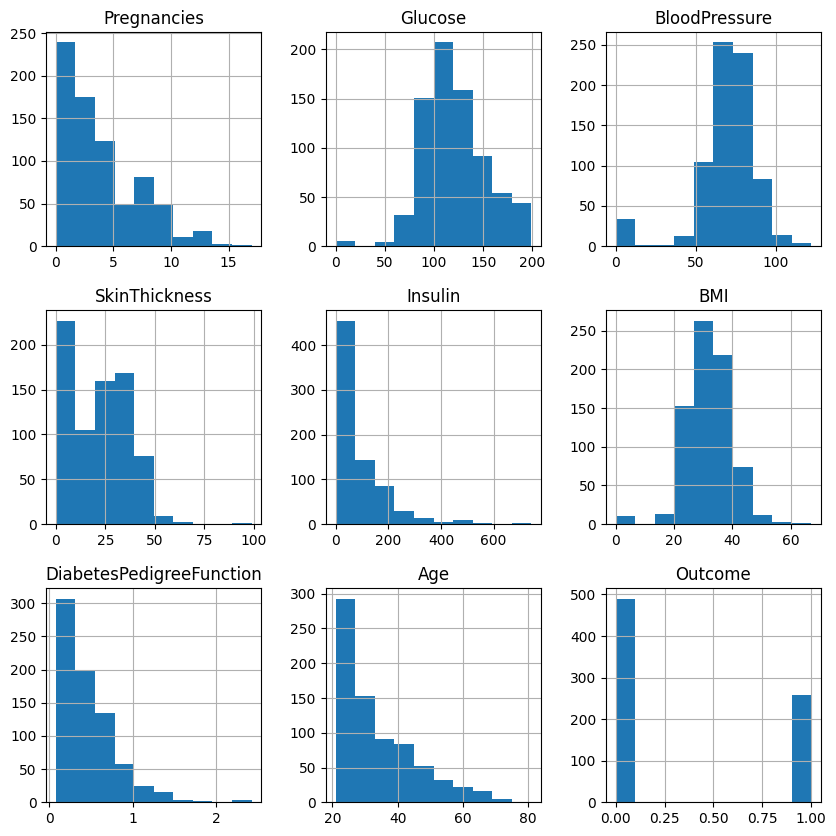

In [ ]:
# Plotting the data distribution plots
p = train.hist(figsize = (10,10))

In [ ]:
# Aiming to input NAN values for the columns in accordance with their distribution

train_copy['Glucose'].fillna(train_copy['Glucose'].mean(), inplace = True)
train_copy['BloodPressure'].fillna(train_copy['BloodPressure'].mean(), inplace = True)
train_copy['SkinThickness'].fillna(train_copy['SkinThickness'].median(), inplace = True)
train_copy['Insulin'].fillna(train_copy['Insulin'].median(), inplace = True)
train_copy['BMI'].fillna(train_copy['BMI'].median(), inplace = True)

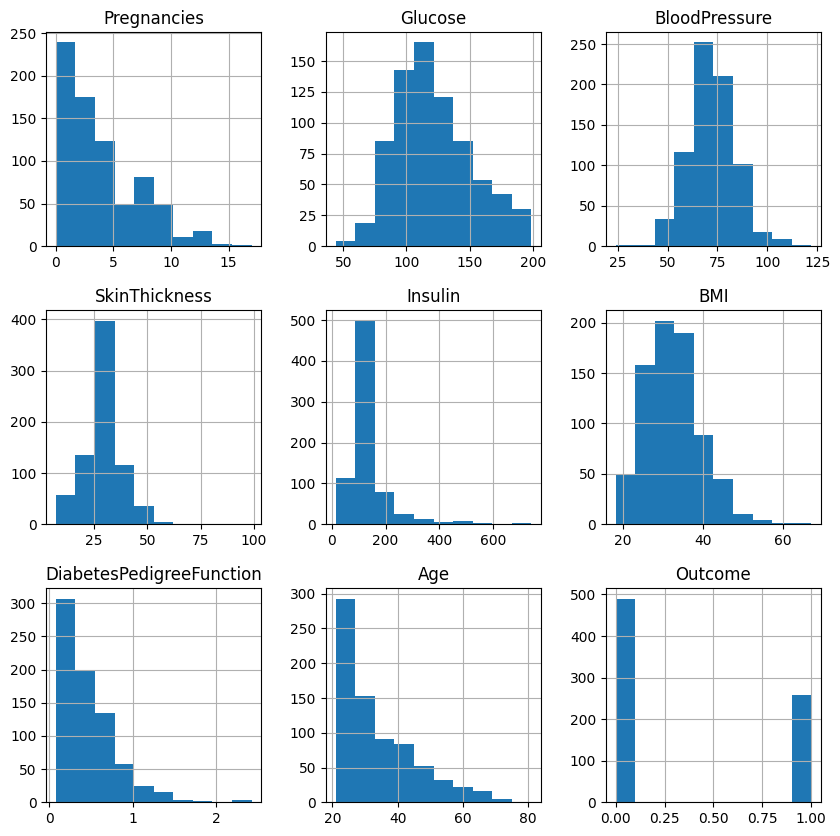

In [ ]:
# Plotting the distribution after removing the NAN values

p = train_copy.hist(figsize = (10,10))

In [ ]:
# Scaling the data

train_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
4,5,116.0,74.0,29.0,125.0,25.6,0.201,30,0


In [ ]:
# Scaling the data by fitting

sc_X = StandardScaler()
X = pd.DataFrame(sc_X.fit_transform(train_copy.drop(['Outcome'], axis = 1),), columns = ['Pregnacies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
X.head

<bound method NDFrame.head of      Pregnacies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0      0.651657  0.874579      -0.035394       0.669222 -0.175395  0.165058   
1     -0.847235 -1.203817      -0.537467      -0.011374 -0.175395 -0.858080   
2      1.251214  2.029244      -0.704825      -0.011374 -0.175395 -1.340417   
3     -1.147013  0.511685      -2.713118       0.669222  0.351347  1.553603   
4      0.351879 -0.181114       0.131964      -0.011374 -0.175395 -1.004243   
..          ...       ...            ...            ...       ...       ...   
743    1.850771 -0.675971       0.299322       2.143845  0.498345  0.062744   
744   -0.547456  0.016828      -0.202751      -0.238239 -0.175395  0.632779   
745    0.351879 -0.016162      -0.035394      -0.691969 -0.334643 -0.916545   
746   -0.847235  0.148790      -1.039540      -0.011374 -0.175395 -0.346511   
747   -0.847235 -0.939894      -0.202751       0.215491 -0.175395 -0.302662   

     DiabetesPedigree

In [ ]:
y = train_copy.Outcome

In [ ]:
y

0      1
1      0
2      1
3      1
4      0
      ..
743    0
744    0
745    0
746    1
747    0
Name: Outcome, Length: 748, dtype: int64

In [ ]:
# Splitting the dataset

X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size=0.2, stratify=y, random_state=2)


In [ ]:
# Showing the data of the splitted data

print(X.shape, X_valid.shape, X_train.shape)

(748, 8) (150, 8) (598, 8)


In [ ]:
#This layer will shift and scale inputs into a distribution centered around 0
#with standard deviation 1.It accomplishes this by precomputing the mean and
#variance of the data,and calling (input-mean)/sqrt(var)at run time.
norm_layer = tf.keras.layers.Normalization (input_shape = X_train.shape[1:])

In [ ]:
# Model creation
import tensorflow as tf

model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1)
])

In [ ]:
# https://keras.io/api/models/model_training_apis/
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])

In [ ]:
norm_layer.adapt(X_train)

In [ ]:
history = model.fit(X_train, y_train, epochs=20, validation_data = (X_valid, y_valid))

Epoch 1/20
19/19 [==============================] - 3s 39ms/step - loss: 0.2354 - root_mean_squared_error: 0.4851 - val_loss: 0.2028 - val_root_mean_squared_error: 0.4503
Epoch 2/20
19/19 [==============================] - 0s 14ms/step - loss: 0.1771 - root_mean_squared_error: 0.4208 - val_loss: 0.1771 - val_root_mean_squared_error: 0.4208
Epoch 3/20
19/19 [==============================] - 0s 11ms/step - loss: 0.1592 - root_mean_squared_error: 0.3990 - val_loss: 0.1676 - val_root_mean_squared_error: 0.4094
Epoch 4/20
19/19 [==============================] - 0s 9ms/step - loss: 0.1514 - root_mean_squared_error: 0.3891 - val_loss: 0.1647 - val_root_mean_squared_error: 0.4059
Epoch 5/20
19/19 [==============================] - 0s 5ms/step - loss: 0.1442 - root_mean_squared_error: 0.3797 - val_loss: 0.1634 - val_root_mean_squared_error: 0.4042
Epoch 6/20
19/19 [==============================] - 0s 4ms/step - loss: 0.1379 - root_mean_squared_error: 0.3714 - val_loss: 0.1609 - val_root_mean

In [ ]:
# Loading the Test Data
#test = pd.read_csv('/content/MLAula13_diabetesTEST4student.csv')
#test.head()

In [ ]:
#X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size=0.2, stratify=y, random_state=2)
mse_valid, rmse_valid = model.evaluate(X_valid, y_valid)
rmse_valid

5/5 [==============================] - 0s 3ms/step - loss: 0.1764 - root_mean_squared_error: 0.4200


0.42002126574516296

In [ ]:
X_new = X_valid [:3]
y_pred = model.predict(X_new)

1/1 [==============================] - 0s 102ms/step


In [ ]:
y_pred

array([[ 0.05830758],
       [-0.06704934],
       [ 0.5669184 ]], dtype=float32)

In [ ]:
# Defining our dependent and independent variables.

# dependent variable
y = train["Outcome"]

# independent variables
X = train.drop(["Outcome"], axis=1)

In [ ]:
# Using KNN Model

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import GridSearchCV, cross_validate

knn_model = KNeighborsClassifier().fit(X, y)

In [ ]:
# Model evaluation
y_pred = knn_model.predict(X)

y_prob = knn_model.predict_proba(X)[:, 1]
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       490
           1       0.74      0.65      0.69       258

    accuracy                           0.80       748
   macro avg       0.78      0.76      0.77       748
weighted avg       0.80      0.80      0.80       748



In [ ]:
roc_auc_score(y, y_prob)

0.8722710014238253

In [ ]:
# Hyperparameter Tuning for knn model

# Creating a KNN classification model
knn_model = KNeighborsClassifier()
knn_params = {
    "n_neighbors": range(2, 50),
    "metric": ['euclidean', 'manhattan', 'chebyshev']
}

# Finding the best parameter combination with GridSearchCV
knn_gs_best = GridSearchCV(knn_model,
                           knn_params,
                           cv=5,  # Cross-validation fold number
                           n_jobs=-1,
                           verbose=1).fit(X, y)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


In [ ]:
# Best parameters
knn_gs_best.best_params_

{'metric': 'manhattan', 'n_neighbors': 22}

In [ ]:
# Final model
knn_final = knn_model.set_params(**knn_gs_best.best_params_).fit(X, y)

In [ ]:
# Cross validation for final model
cv_results = cross_validate(knn_final,
                            X,
                            y,
                            cv=5,
                            scoring=["accuracy", "f1", "roc_auc"])

In [ ]:
# Final model's results
cv_results['test_accuracy'].mean()

cv_results['test_f1'].mean()

cv_results['test_roc_auc'].mean()

0.8037099455166683

In [ ]:
import shutil

In [ ]:
shutil.rmtree("my_keras_model", ignore_errors=True)

In [ ]:
# Saving the model

model.save("my_keras_model", save_format="tf")

In [ ]:
# Loading the model

model = tf.keras.models.load_model("my_keras_model")


In [ ]:
model.save_weights("my_weights")

In [ ]:
model.load_weights("my_weights")

In [ ]:
# save model + weights + training configuration
import os
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# Loading the Test Data
test = pd.read_csv('/content/MLAula13_diabetesTEST4student.csv')
test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0,101,65,28,0,24.6,0.237,22
1,0,131,0,0,0,43.2,0.270,26
2,0,146,82,0,0,40.5,1.781,44
3,1,103,30,38,83,43.3,0.183,33
4,1,189,60,23,846,30.1,0.398,59


In [ ]:
train = pd.read_csv('/content/MLAula13_diabetesTRAIN4student.csv')
test = pd.read_csv('/content/MLAula13_diabetesTEST4student.csv')

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, stratify=y, random_state=2)

In [ ]:
#Making predictions based on training data

y_pred = knn_model.predict(X)
#predictions = classifier.predict(X_train)

In [ ]:
# Showing accuracy score with training data

accuracy = accuracy_score(y, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7914438502673797


In [ ]:
 #Making predictions based on test data

 y_pred = knn_model.predict(X_test)
 #predictions = classifier.predict(X_test)
 y_pred

array([0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0])

In [ ]:
# Showing accuracy score with test data

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8066666666666666


In [ ]:
# Making predictive system

train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [ ]:
input_data = (4, 110, 92, 0, 0, 37.6, 0.191, 30)
# Converting input_data to numpyarray
data_to_np_array = np.asarray(input_data)

#Reshape the array as we are predicting for one instance
input_data_reshaped = data_to_np_array.reshape(1, -1)

In [ ]:
# Standardizing the input data

scaler = StandardScaler()
scaler.fit(X)
std_data = scaler.transform(input_data_reshaped)
std_data

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 0.05210051, -0.33485928,  1.18827698, -1.27983532, -0.70412702,
         0.71124036, -0.8564701 , -0.2693216 ]])

In [ ]:
# Making Prediction

y_pred = knn_model.predict(std_data)
y_pred

if (y_pred[0] == 0):
  print("The person is not Diabetic.")
else:
  print("The person is Diabetic.")

The person is not Diabetic.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
